In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [19]:
!pip install gdown




Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [24]:
import os

print("Train exists:", os.path.exists("dataset/train"))
print("Valid exists:", os.path.exists("dataset/valid"))
print("Test exists:", os.path.exists("dataset/test"))


Train exists: True
Valid exists: True
Test exists: True


In [ ]:
!unzip train_test_valid.zip -d dataset


Archive:  train_test_valid.zip
   creating: dataset/valid/Apple___Apple_scab/
  inflating: dataset/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG  
  inflating: dataset/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_90deg.JPG  
  inflating: dataset/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG  
  inflating: dataset/valid/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG  
  inflating: dataset/valid/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_90deg.JPG  
  inflating: dataset/valid/Apple___Apple_scab/023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG  
  inflating: dataset/valid/Apple___Apple_scab/023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487_90deg.JPG  
  inflating: dataset/valid/Apple___Apple_scab/0261a6e4-21f8-481a-8827-b674e6955644___FREC_Scab 3055.JPG  
  inflating: dataset/valid/

In [25]:
!ls dataset


test  train  valid


In [20]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [21]:
import tensorflow  as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
!pip install matplotlib seaborn pandas


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


### Data Preprocessing

  

In [27]:
TRAIN_DIR = "dataset/train"
VALID_DIR = "dataset/valid"
TEST_DIR  = "dataset/test"


In [29]:

Training_set=tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred", ## label = inferred mtlb apne take directory name as label name
    label_mode="categorical",   ## kyuki hmare label should be encoded as categorical values naki int & its a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1763548176.846480  105870 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38227 MB memory:  -> device: 0, name: NVIDIA H100 80GB HBM3 MIG 3g.40gb, pci bus id: 0000:9d:00.0, compute capability: 9.0


In [30]:
Validation_set=tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    labels="inferred", 
    label_mode="categorical",   
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
 
)

Found 17572 files belonging to 38 classes.


In [31]:
 for x,y in Training_set:
     print(x,x.shape)                  ## training set dekhne ke liye
     print(y,y.shape)
    
     break

tf.Tensor(
[[[[161.   163.   176.  ]
   [166.   168.   181.  ]
   [165.   167.   180.  ]
   ...
   [110.   108.   122.  ]
   [109.75 107.75 121.75]
   [110.5  108.5  122.5 ]]

  [[162.5  164.5  177.5 ]
   [161.25 163.25 176.25]
   [160.75 162.75 175.75]
   ...
   [113.5  111.5  125.5 ]
   [115.25 113.25 127.25]
   [115.   113.   127.  ]]

  [[170.   172.   185.  ]
   [163.5  165.5  178.5 ]
   [160.25 162.25 175.25]
   ...
   [109.   107.   121.  ]
   [112.   110.   124.  ]
   [117.   115.   129.  ]]

  ...

  [[220.5  222.5  235.5 ]
   [205.   207.   220.  ]
   [196.5  198.5  211.5 ]
   ...
   [130.75 128.75 142.25]
   [140.5  138.75 149.5 ]
   [145.75 144.75 152.75]]

  [[202.75 204.75 219.75]
   [208.   210.   225.  ]
   [192.25 194.25 209.25]
   ...
   [147.5  145.5  158.25]
   [146.5  145.25 153.5 ]
   [129.   128.   134.5 ]]

  [[216.75 218.75 233.75]
   [209.25 211.25 226.25]
   [191.5  193.5  208.5 ]
   ...
   [136.5  134.75 146.  ]
   [137.5  136.5  143.5 ]
   [139.75 138.75 14

### To avoid problem of overshooting 
1.choose small learning rate , default is 0.001 : we are taking 0.0001
2.There may be chance of Underfitting , so increase of number of neuron
3. Add more conv layers to extract more features from images , as there may be possibility our model is unable to capture relevant feature or model is getting confused due to lack of features , so feed it with more features

### Building Model

In [32]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential



In [33]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [34]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Dropout(0.25)) # to avoid overfitting

In [40]:
model.add(Flatten())

In [41]:
model.add(Dense(units=1500,activation='relu'))  # neurons 1024 the pehle ab 1500 krdiye

In [42]:
model.add(Dropout(0.4))

In [43]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])  # learning rate aur kam krdia

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Training Our Model

In [46]:
 training_history=model.fit(x=Training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10


2025-11-19 10:31:08.068498: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fece80147d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-19 10:31:08.068517: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA H100 80GB HBM3 MIG 3g.40gb, Compute Capability 9.0
2025-11-19 10:31:08.134349: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-19 10:31:08.547054: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90600
2025-11-19 10:31:08.704304: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-19 10:31:08.7

  24/2197 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.0416 - loss: 3.9001        

I0000 00:00:1763548277.225635  123537 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4077 - loss: 2.0991

2025-11-19 10:31:43.325031: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-19 10:31:44.180685: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 4 bytes spill stores, 4 bytes spill loads

2025-11-19 10:31:44.246931: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 260 bytes spill stores, 204 bytes spill loads

2025-11-19 10:31:44.324483: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 176 byte

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.6093 - loss: 1.3270 - val_accuracy: 0.8403 - val_loss: 0.5106
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8618 - loss: 0.4359 - val_accuracy: 0.9011 - val_loss: 0.3071
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9150 - loss: 0.2668 - val_accuracy: 0.9248 - val_loss: 0.2281
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9392 - loss: 0.1873 - val_accuracy: 0.9424 - val_loss: 0.1776
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9535 - loss: 0.1409 - val_accuracy: 0.9610 - val_loss: 0.1220
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9635 - loss: 0.1117 - val_accuracy: 0.9458 - val_loss: 0.1672
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9721 - loss: 0.0885 - val_accuracy: 0.9527 - val_loss: 0.1532
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9761 - loss: 0.0731 - va

In [47]:
model.save("plant_disease_70k.h5")


In [48]:
model.save("plant_disease_70k.keras")


In [ ]:
# EVALUATING THE MODEL

In [49]:
# Evaluate on training set
train_loss, train_acc = model.evaluate(Training_set)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_acc)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(Validation_set)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0445
Training Loss: 0.044465482234954834
Training Accuracy: 0.9850060343742371
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1361
Validation Loss: 0.13605372607707977
Validation Accuracy: 0.9601638913154602


In [52]:
import pandas as pd
training_history = pd.DataFrame(training_history.history)
training_history.to_csv("training_history.csv", index=False)


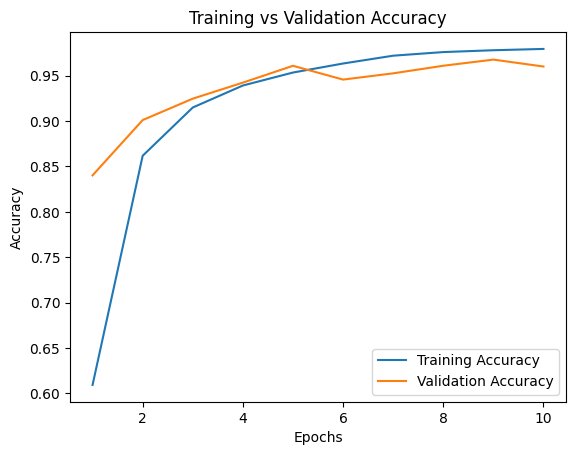

In [53]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_history['accuracy']) + 1)

plt.plot(epochs, training_history['accuracy'], label='Training Accuracy')
plt.plot(epochs, training_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [54]:
TEST_DIR = "dataset/test"


In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels="inferred",
    label_mode="categorical",
    image_size=(128,128),
    batch_size=32,
    shuffle=False
)


Found 33 files belonging to 1 classes.


In [56]:
import tensorflow as tf

y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)


2025-11-19 10:45:35.881806: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [62]:
class_names = Validation_set.class_names
print("Classes:", class_names)


Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False
)


Found 17572 files belonging to 38 classes.


In [65]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


(array([[9.99999762e-01, 2.52845524e-07, 3.06179215e-09, ...,
         1.47146278e-15, 8.98921127e-16, 1.46187722e-13],
        [9.99932647e-01, 6.73130198e-05, 1.52036095e-09, ...,
         2.47389542e-14, 7.08150196e-16, 2.57283683e-14],
        [1.00000000e+00, 2.29878991e-10, 2.22855334e-09, ...,
         6.24155046e-18, 1.13040200e-16, 7.28766480e-15],
        ...,
        [1.43295695e-10, 3.36501356e-12, 1.73713044e-08, ...,
         1.02077045e-11, 1.19614138e-10, 9.99998212e-01],
        [3.45894091e-10, 6.86660928e-12, 3.45899736e-08, ...,
         1.47507326e-10, 1.00386011e-09, 9.99994993e-01],
        [2.64756112e-18, 8.29106522e-20, 1.40048907e-17, ...,
         5.69333835e-21, 1.10086366e-17, 1.00000191e+00]], dtype=float32),
 (17572, 38))

In [66]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [67]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories


2025-11-19 11:07:11.228861: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [68]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [70]:
# Step 4 — Classification report
from sklearn.metrics import classification_report

print(classification_report(Y_true, predicted_categories, target_names=class_names))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.97       504
                                 Apple___Black_rot       0.91      1.00      0.95       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.83      0.89       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.99      0.

In [78]:
cm=confusion_matrix(Y_true,predicted_categories)

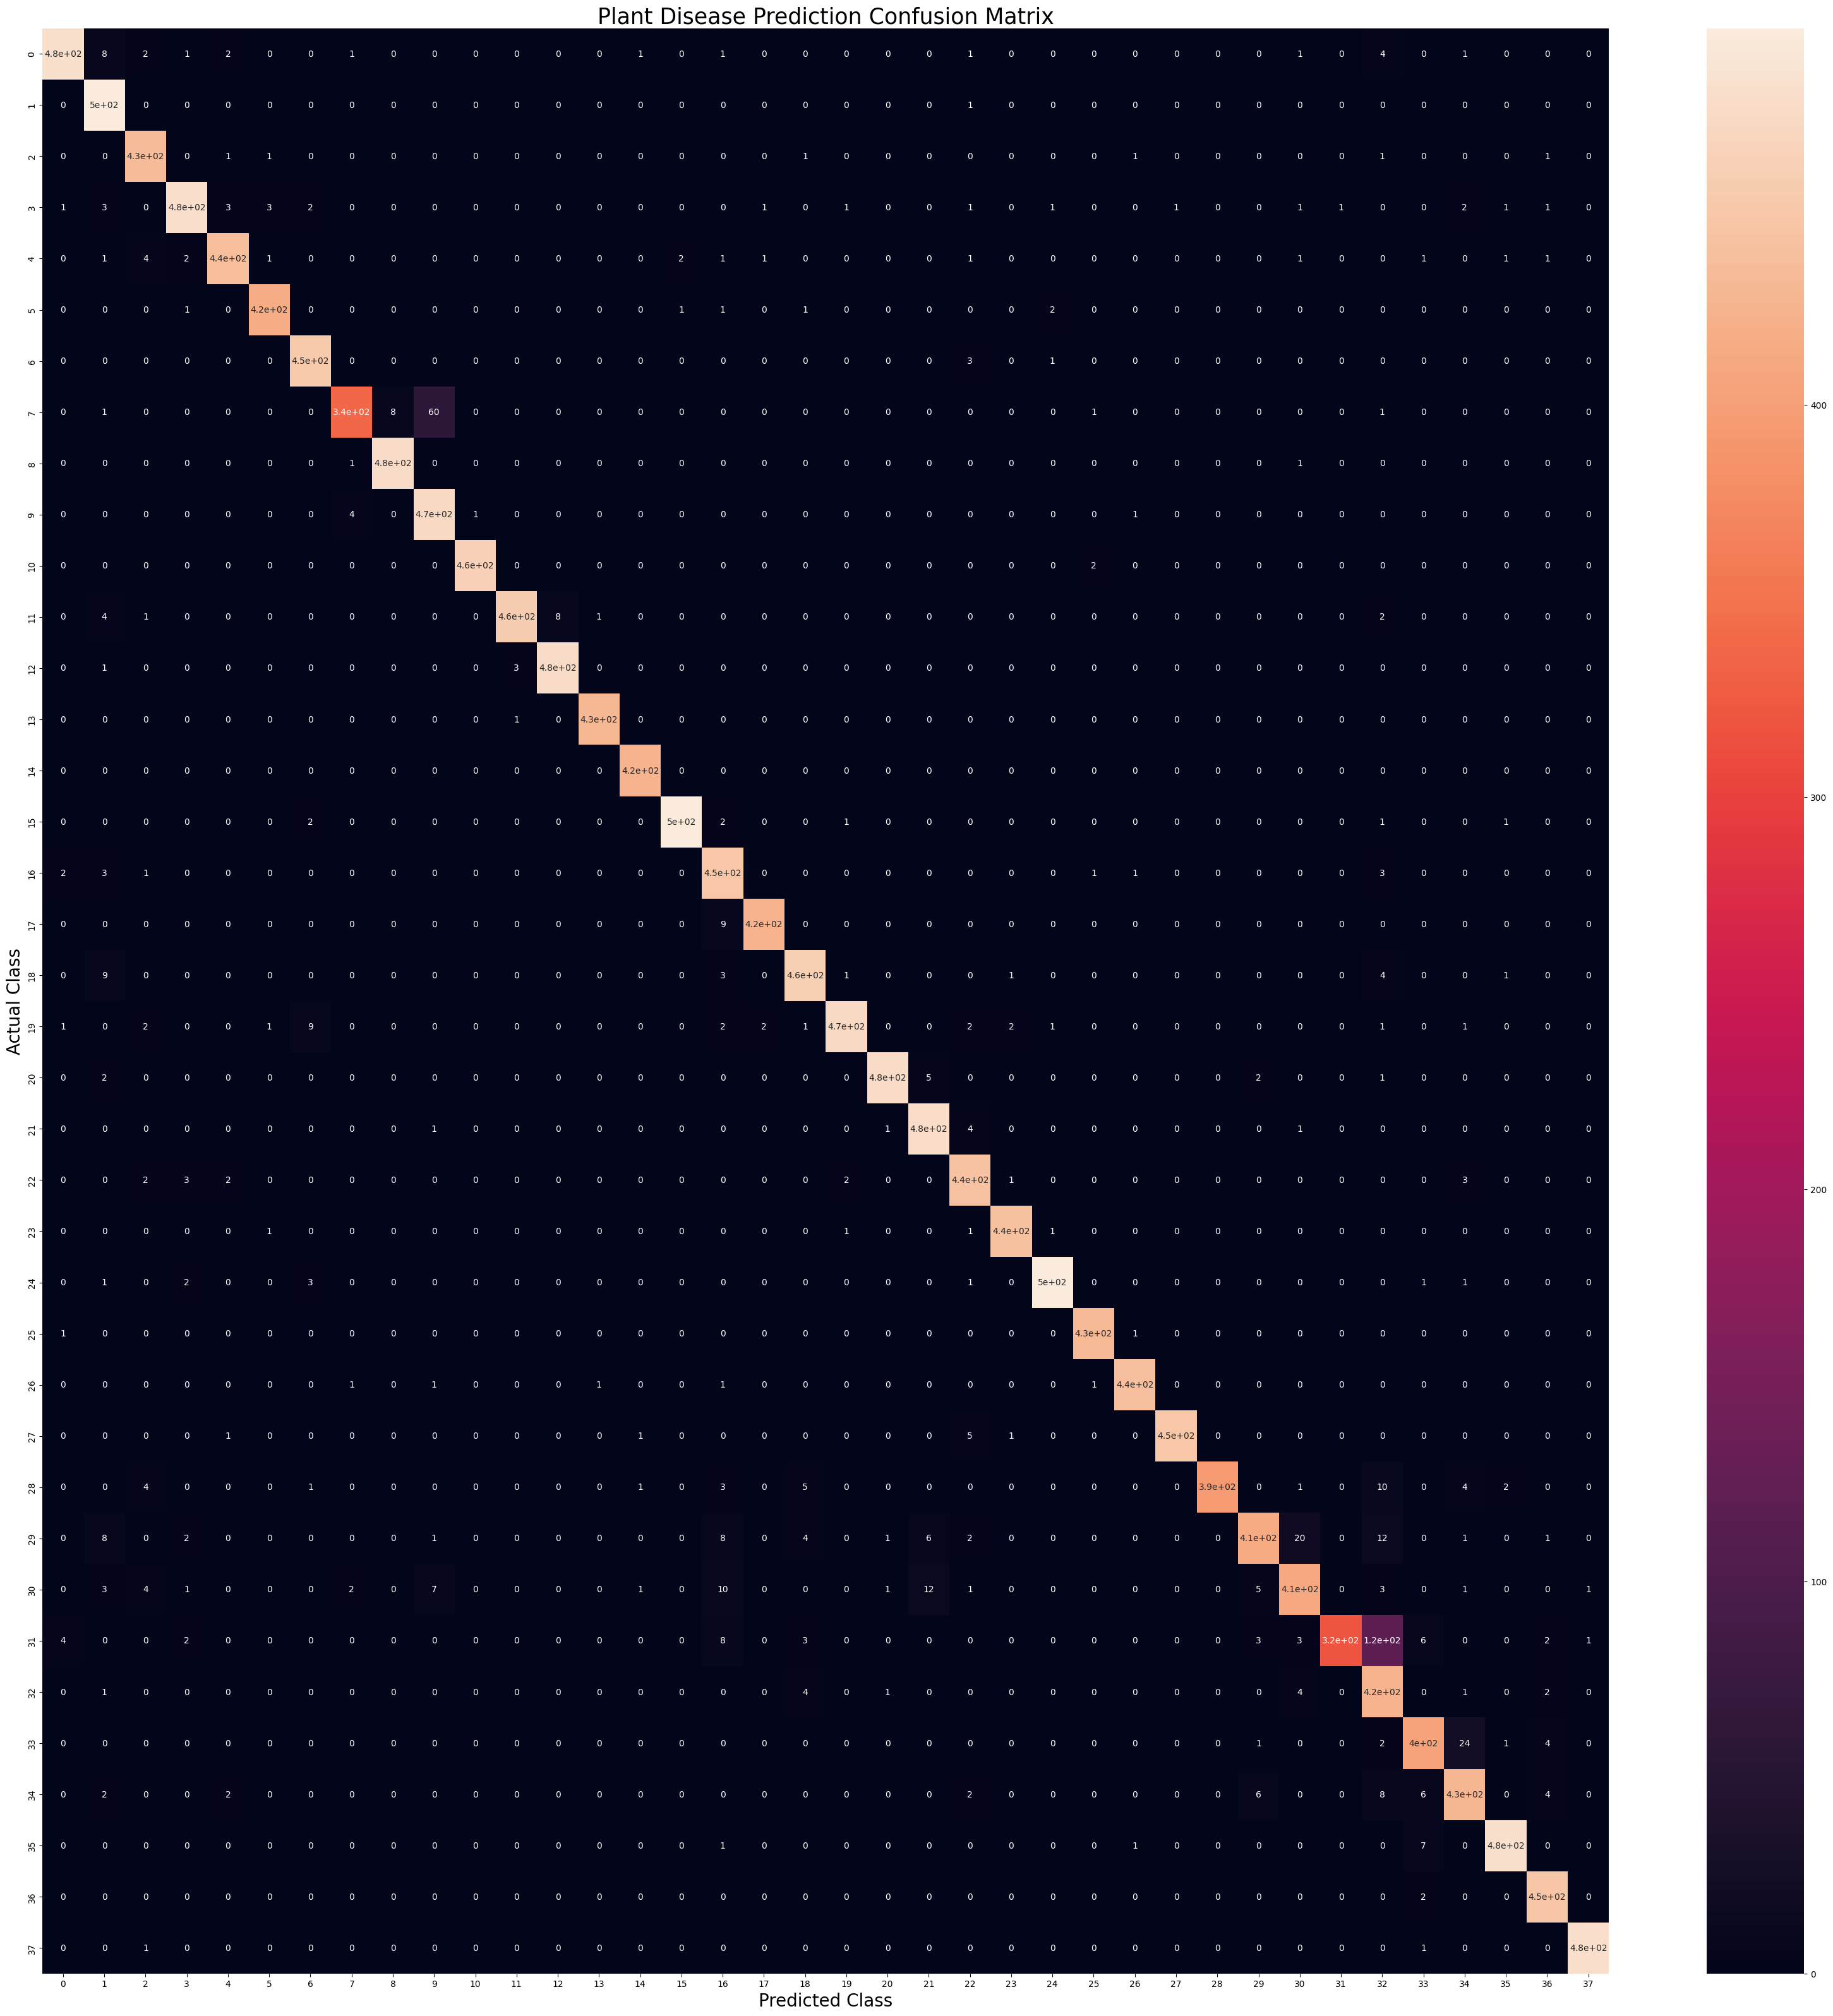

In [79]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()


In [1]:
# Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


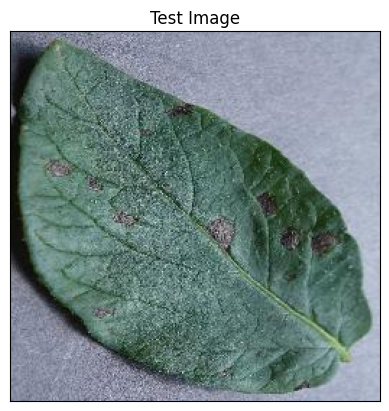

In [4]:
import cv2

image_path = "PotatoEarlyBlight3.JPG"   # ← change path if needed

# Reading Image
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Image not found. Check the path!")

# Convert BGR → RGB (OpenCV loads in BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying Image
plt.imshow(img_rgb)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()



In [6]:
model = tf.keras.models.load_model("plant_disease_70k.keras")


ValueError: File not found: filepath=plant_disease_70k.keras. Please ensure the file is an accessible `.keras` zip file.

In [93]:
#predict images 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image



In [94]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])   # Convert single image → batch
print(input_arr.shape)


(1, 128, 128, 3)


In [95]:
prediction = model.predict(input_arr)
prediction, prediction.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


(array([[1.0430203e-25, 2.1567018e-25, 8.8870127e-27, 1.2234154e-27,
         7.6595403e-33, 7.0798182e-31, 2.0750084e-30, 1.2975871e-21,
         1.0000000e+00, 1.6385823e-23, 1.6616186e-25, 7.5447694e-31,
         9.0531037e-34, 1.0518027e-32, 2.8139913e-36, 1.1965724e-25,
         2.3222823e-26, 4.4788429e-34, 1.9955876e-27, 8.7189468e-27,
         5.5444098e-25, 6.3014396e-38, 2.3442232e-25, 1.8967218e-34,
         4.3209433e-31, 6.3917325e-26, 2.0902711e-29, 5.0113941e-36,
         1.3072744e-30, 2.3900942e-25, 5.7662501e-22, 8.5145940e-36,
         3.0426796e-32, 2.6526724e-36, 1.6222990e-31, 2.1349043e-32,
         9.5928095e-36, 1.0650469e-30]], dtype=float32),
 (1, 38))

In [96]:
result_index = np.argmax(prediction)
result_index


8

In [97]:
print("Predicted Class:", class_name[result_index])


Predicted Class: Corn_(maize)___Common_rust_


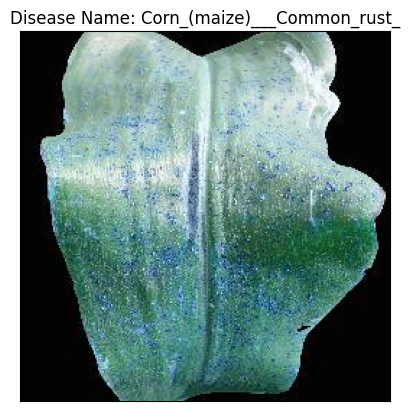

In [98]:
# Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
